### Setup 

In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Statistical Tests
import scipy.stats as stats
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs
from scipy.stats import norm

np.set_printoptions(suppress=True)


# Visualizing
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.dates as dates
import seaborn as sns
from sklearn.model_selection import learning_curve
import datetime

pd.options.display.float_format = '{:20,.2f}'.format



In [2]:
import env

import wrangle

from wrangle import clean_zillow, missing_zero_values_table, features_missing, handle_missing_values, get_zillow_data, split, seperate_y, scale_data, split_seperate_scale 

import explore

### Acquisition 

In [3]:
df = pd.read_csv('zillowcluster_df.csv') 

In [4]:
df.head()

,Unnamed: 0,typeconstructiontypeid,storytypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,parcelid,id,basementsqft,...,taxdelinquencyyear,censustractandblock,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,storydesc,typeconstructiondesc
0,0,nan,nan,2.00,nan,nan,nan,10711855,1087254,nan,...,nan,"60,371,132,321,007.00",-0.01,2017-07-07,NaN,NaN,NaN,Central,NaN,NaN
1,1,nan,nan,2.00,nan,nan,1.00,10711877,1072280,nan,...,nan,"60,371,132,321,007.00",0.02,2017-08-29,Central,NaN,NaN,Central,NaN,NaN
2,2,nan,nan,2.00,nan,nan,1.00,10711888,1340933,nan,...,nan,"60,371,132,321,007.00",0.08,2017-04-04,Central,NaN,NaN,Central,NaN,NaN
3,3,nan,nan,2.00,nan,nan,nan,10711910,1878109,nan,...,nan,"60,371,132,321,008.00",-0.04,2017-03-17,NaN,NaN,NaN,Central,NaN,NaN
4,4,nan,nan,2.00,nan,nan,nan,10711923,2190858,nan,...,nan,"60,371,132,321,008.00",-0.01,2017-03-24,NaN,NaN,NaN,Central,NaN,NaN


In [5]:
df.shape

(77413, 68)

In [6]:
clean_df = clean_zillow(df)

In [7]:
clean_df.head()

,heatingorsystemtypeid,airconditioningtypeid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,poolcnt,...,age_bin,baths_per_sqft,taxrate,acres,acres_bin,sqft_bin,bath_bed_ratio,la_county,orange_county,ventura_county
parcelid,,,,,,,,,,,,,,,,,,,,,
10711855,2.00,5.00,2.00,3.00,"2,107.00",6037,34.22,-118.62,"9,158.00",1.00,...,0.33,0.00,1.23,0.21,0.30,0.50,0.67,1,0,0
10711877,2.00,1.00,2.00,4.00,"1,882.00",6037,34.22,-118.62,"9,035.00",1.00,...,0.33,0.00,1.23,0.21,0.30,0.40,0.50,1,0,0
10711888,2.00,1.00,2.00,4.00,"1,882.00",6037,34.22,-118.62,"9,800.00",0.00,...,0.33,0.00,1.23,0.22,0.30,0.40,0.50,1,0,0
10711910,2.00,5.00,2.00,3.00,"1,477.00",6037,34.22,-118.62,"11,285.00",1.00,...,0.47,0.00,1.43,0.26,0.30,0.30,0.67,1,0,0
10711923,2.00,5.00,2.00,4.00,"1,918.00",6037,34.22,-118.62,"11,239.00",1.00,...,0.47,0.00,1.26,0.26,0.30,0.40,0.50,1,0,0


In [8]:
clean_df.shape

(59959, 30)

In [9]:
train, validate, test = split(clean_df)

In [10]:
train.head()

,heatingorsystemtypeid,airconditioningtypeid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,poolcnt,...,age_bin,baths_per_sqft,taxrate,acres,acres_bin,sqft_bin,bath_bed_ratio,la_county,orange_county,ventura_county
parcelid,,,,,,,,,,,,,,,,,,,,,
17054354,1.00,5.00,2.00,4.00,"1,311.00",6111,34.44,-119.30,"9,552.00",0.00,...,0.40,0.00,2.30,0.22,0.30,0.30,0.50,0,0,1
12539496,2.00,1.00,2.00,2.00,"1,111.00",6037,33.77,-118.15,"18,703.00",1.00,...,0.27,0.00,1.19,0.43,0.30,0.20,1.00,1,0,0
14720441,1.00,5.00,2.50,3.00,"1,689.00",6059,33.61,-117.62,"3,150.00",0.00,...,0.27,0.00,1.26,0.07,0.00,0.40,0.83,0,1,0
11291732,2.00,1.00,2.00,4.00,"1,329.00",6037,34.68,-118.12,"6,335.00",0.00,...,0.33,0.00,1.87,0.15,0.10,0.30,0.50,1,0,0
14320729,1.00,13.00,2.00,4.00,"2,175.00",6059,33.63,-117.81,"6,240.00",0.00,...,0.33,0.00,1.04,0.14,0.10,0.50,0.50,0,1,0


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33576 entries, 17054354 to 13884593
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   heatingorsystemtypeid         33576 non-null  float64       
 1   airconditioningtypeid         33576 non-null  float64       
 2   bathroomcnt                   33576 non-null  float64       
 3   bedroomcnt                    33576 non-null  float64       
 4   calculatedfinishedsquarefeet  33576 non-null  float64       
 5   fips                          33576 non-null  object        
 6   latitude                      33576 non-null  float64       
 7   longitude                     33576 non-null  float64       
 8   lotsizesquarefeet             33576 non-null  float64       
 9   poolcnt                       33576 non-null  float64       
 10  roomcnt                       33576 non-null  float64       
 11  yearbuilt         

In [12]:
train.describe()

,heatingorsystemtypeid,airconditioningtypeid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,latitude,longitude,lotsizesquarefeet,poolcnt,roomcnt,...,age_bin,baths_per_sqft,taxrate,acres,acres_bin,sqft_bin,bath_bed_ratio,la_county,orange_county,ventura_county
count,"33,576.00","33,576.00","33,576.00","33,576.00","33,576.00","33,576.00","33,576.00","33,576.00","33,576.00","33,576.00",...,"33,576.00","33,576.00","33,576.00","33,576.00","33,576.00","33,576.00","33,576.00","33,576.00","33,576.00","33,576.00"
mean,2.97,4.20,2.22,3.06,"1,707.34",33.99,-118.18,"8,175.48",0.18,1.74,...,0.38,0.00,1.28,0.19,0.17,0.36,0.76,0.59,0.32,0.09
std,3.40,2.23,0.83,0.95,728.41,0.27,0.37,"5,264.44",0.38,2.97,...,0.15,0.00,0.22,0.12,0.10,0.18,0.27,0.49,0.46,0.29
min,1.00,1.00,1.00,1.00,360.00,33.34,-119.48,236.00,0.00,0.00,...,0.00,0.00,0.23,0.01,0.00,0.00,0.20,0.00,0.00,0.00
25%,1.00,1.00,2.00,2.00,"1,197.00",33.79,-118.40,"5,736.00",0.00,0.00,...,0.27,0.00,1.16,0.13,0.10,0.20,0.50,0.00,0.00,0.00
50%,2.00,5.00,2.00,3.00,"1,535.00",33.99,-118.14,"7,230.50",0.00,0.00,...,0.40,0.00,1.22,0.17,0.20,0.40,0.67,1.00,0.00,0.00
75%,2.00,5.00,3.00,4.00,"2,049.00",34.17,-117.90,"8,269.00",0.00,4.00,...,0.47,0.00,1.34,0.19,0.20,0.50,1.00,1.00,1.00,0.00
max,24.00,13.00,10.00,10.00,"4,996.00",34.72,-117.55,"36,778.00",1.00,12.00,...,0.93,0.00,2.30,0.84,0.40,0.80,3.00,1.00,1.00,1.00


In [13]:
train.shape

(33576, 30)

In [14]:
validate.shape

(14391, 30)

In [15]:
test.shape

(11992, 30)

In [16]:
train_scaled, validate_scaled, test_scaled = scale_data(train, validate, test)

In [17]:
train_scaled.head()

,heatingorsystemtypeid,airconditioningtypeid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,latitude,longitude,lotsizesquarefeet,poolcnt,roomcnt,...,age_of_home,age_bin,baths_per_sqft,taxrate,acres,acres_bin,sqft_bin,la_county,orange_county,ventura_county
0,0.00,0.33,0.11,0.33,0.21,0.80,0.09,0.25,0.00,0.58,...,0.41,0.43,0.41,1.00,0.25,0.75,0.38,0.00,0.00,1.00
1,0.04,0.00,0.11,0.11,0.16,0.31,0.69,0.51,1.00,0.00,...,0.26,0.29,0.48,0.46,0.51,0.75,0.25,1.00,0.00,0.00
2,0.00,0.33,0.17,0.22,0.29,0.20,0.97,0.08,0.00,0.00,...,0.19,0.29,0.40,0.50,0.07,0.00,0.50,0.00,1.00,0.00
3,0.04,0.00,0.11,0.33,0.21,0.97,0.70,0.17,0.00,0.00,...,0.33,0.36,0.40,0.79,0.17,0.25,0.38,1.00,0.00,0.00
4,0.00,1.00,0.11,0.33,0.39,0.21,0.87,0.16,0.00,0.67,...,0.29,0.36,0.25,0.39,0.16,0.25,0.62,0.00,1.00,0.00


In [18]:
train_scaled.describe()

,heatingorsystemtypeid,airconditioningtypeid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,latitude,longitude,lotsizesquarefeet,poolcnt,roomcnt,...,age_of_home,age_bin,baths_per_sqft,taxrate,acres,acres_bin,sqft_bin,la_county,orange_county,ventura_county
count,"33,576.00","33,576.00","33,576.00","33,576.00","33,576.00","33,576.00","33,576.00","33,576.00","33,576.00","33,576.00",...,"33,576.00","33,576.00","33,576.00","33,576.00","33,576.00","33,576.00","33,576.00","33,576.00","33,576.00","33,576.00"
mean,0.09,0.27,0.14,0.23,0.29,0.47,0.67,0.22,0.18,0.15,...,0.35,0.41,0.36,0.51,0.21,0.43,0.44,0.59,0.32,0.09
std,0.15,0.19,0.09,0.11,0.16,0.19,0.19,0.14,0.38,0.25,...,0.17,0.16,0.10,0.11,0.15,0.25,0.22,0.49,0.46,0.29
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.11,0.11,0.18,0.33,0.56,0.15,0.00,0.00,...,0.22,0.29,0.29,0.45,0.14,0.25,0.25,0.00,0.00,0.00
50%,0.04,0.33,0.11,0.22,0.25,0.47,0.70,0.19,0.00,0.00,...,0.36,0.43,0.35,0.48,0.19,0.50,0.50,1.00,0.00,0.00
75%,0.04,0.33,0.22,0.33,0.36,0.60,0.82,0.22,0.00,0.33,...,0.47,0.50,0.42,0.54,0.22,0.50,0.62,1.00,1.00,0.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


# Modeling

In [19]:
## latitude

## sq footage
### calculatedsquarefeet

## age of home 

## tax rate 

### different model for each county?

In [20]:
list(train_scaled.columns)

['heatingorsystemtypeid',
 'airconditioningtypeid',
 'bathroomcnt',
 'bedroomcnt',
 'calculatedfinishedsquarefeet',
 'latitude',
 'longitude',
 'lotsizesquarefeet',
 'poolcnt',
 'roomcnt',
 'fireplaceflag',
 'taxvaluedollarcnt',
 'taxamount',
 'logerror',
 'age_of_home',
 'age_bin',
 'baths_per_sqft',
 'taxrate',
 'acres',
 'acres_bin',
 'sqft_bin',
 'la_county',
 'orange_county',
 'ventura_county']

In [21]:
X = train_scaled[['latitude', 'calculatedfinishedsquarefeet', 'age_of_home', 'taxrate']]

In [22]:
X.head()

,latitude,calculatedfinishedsquarefeet,age_of_home,taxrate
0,0.80,0.21,0.41,1.00
1,0.31,0.16,0.26,0.46
2,0.20,0.29,0.19,0.50
3,0.97,0.21,0.33,0.79
4,0.21,0.39,0.29,0.39


In [23]:
X.corr()

,latitude,calculatedfinishedsquarefeet,age_of_home,taxrate
latitude,1.00,0.04,0.04,0.33
calculatedfinishedsquarefeet,0.04,1.00,-0.31,-0.08
age_of_home,0.04,-0.31,1.00,0.06
taxrate,0.33,-0.08,0.06,1.00


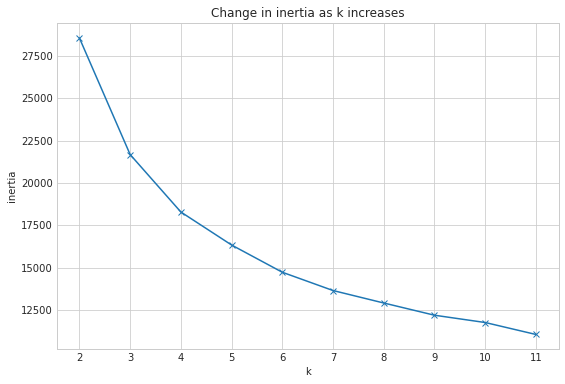

In [24]:
#plot inertia vs k to choose k
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(train_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [25]:
## it looks like the most appropriate k would be 4

In [26]:
kmeans = KMeans(n_clusters=4)
## make the model, n_clusters being how many clusters you want in your model 

kmeans.fit(X)
## fit the model to the fields you want to use in your model

kmeans.predict(X)
## make your predictions

train_scaled['cluster'] = kmeans.predict(X)
## store the predictions as a column on your df

In [27]:
train_scaled.head()

,heatingorsystemtypeid,airconditioningtypeid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,latitude,longitude,lotsizesquarefeet,poolcnt,roomcnt,...,age_bin,baths_per_sqft,taxrate,acres,acres_bin,sqft_bin,la_county,orange_county,ventura_county,cluster
0,0.00,0.33,0.11,0.33,0.21,0.80,0.09,0.25,0.00,0.58,...,0.43,0.41,1.00,0.25,0.75,0.38,0.00,0.00,1.00,3
1,0.04,0.00,0.11,0.11,0.16,0.31,0.69,0.51,1.00,0.00,...,0.29,0.48,0.46,0.51,0.75,0.25,1.00,0.00,0.00,2
2,0.00,0.33,0.17,0.22,0.29,0.20,0.97,0.08,0.00,0.00,...,0.29,0.40,0.50,0.07,0.00,0.50,0.00,1.00,0.00,2
3,0.04,0.00,0.11,0.33,0.21,0.97,0.70,0.17,0.00,0.00,...,0.36,0.40,0.79,0.17,0.25,0.38,1.00,0.00,0.00,3
4,0.00,1.00,0.11,0.33,0.39,0.21,0.87,0.16,0.00,0.67,...,0.36,0.25,0.39,0.16,0.25,0.62,0.00,1.00,0.00,2


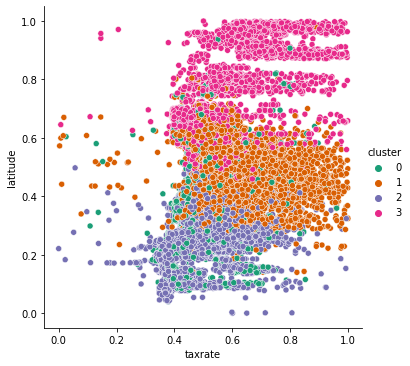

In [28]:
sns.relplot(data=train_scaled, x='taxrate', y='latitude', hue='cluster', palette= 'Dark2')

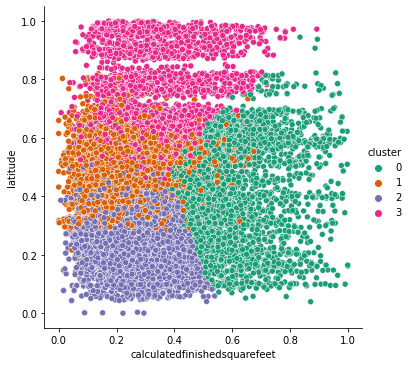

In [29]:
sns.relplot(data=train_scaled, x='calculatedfinishedsquarefeet', y='latitude', hue='cluster', palette= 'Dark2')

In [30]:
## save clusters to csv to be explored

In [31]:
model1 = train

In [32]:
model1.head()

,heatingorsystemtypeid,airconditioningtypeid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,poolcnt,...,age_bin,baths_per_sqft,taxrate,acres,acres_bin,sqft_bin,bath_bed_ratio,la_county,orange_county,ventura_county
parcelid,,,,,,,,,,,,,,,,,,,,,
17054354,1.00,5.00,2.00,4.00,"1,311.00",6111,34.44,-119.30,"9,552.00",0.00,...,0.40,0.00,2.30,0.22,0.30,0.30,0.50,0,0,1
12539496,2.00,1.00,2.00,2.00,"1,111.00",6037,33.77,-118.15,"18,703.00",1.00,...,0.27,0.00,1.19,0.43,0.30,0.20,1.00,1,0,0
14720441,1.00,5.00,2.50,3.00,"1,689.00",6059,33.61,-117.62,"3,150.00",0.00,...,0.27,0.00,1.26,0.07,0.00,0.40,0.83,0,1,0
11291732,2.00,1.00,2.00,4.00,"1,329.00",6037,34.68,-118.12,"6,335.00",0.00,...,0.33,0.00,1.87,0.15,0.10,0.30,0.50,1,0,0
14320729,1.00,13.00,2.00,4.00,"2,175.00",6059,33.63,-117.81,"6,240.00",0.00,...,0.33,0.00,1.04,0.14,0.10,0.50,0.50,0,1,0


In [33]:
model1['cluster'] = kmeans.predict(X)

In [34]:
model1.head()

,heatingorsystemtypeid,airconditioningtypeid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,poolcnt,...,baths_per_sqft,taxrate,acres,acres_bin,sqft_bin,bath_bed_ratio,la_county,orange_county,ventura_county,cluster
parcelid,,,,,,,,,,,,,,,,,,,,,
17054354,1.00,5.00,2.00,4.00,"1,311.00",6111,34.44,-119.30,"9,552.00",0.00,...,0.00,2.30,0.22,0.30,0.30,0.50,0,0,1,3
12539496,2.00,1.00,2.00,2.00,"1,111.00",6037,33.77,-118.15,"18,703.00",1.00,...,0.00,1.19,0.43,0.30,0.20,1.00,1,0,0,2
14720441,1.00,5.00,2.50,3.00,"1,689.00",6059,33.61,-117.62,"3,150.00",0.00,...,0.00,1.26,0.07,0.00,0.40,0.83,0,1,0,2
11291732,2.00,1.00,2.00,4.00,"1,329.00",6037,34.68,-118.12,"6,335.00",0.00,...,0.00,1.87,0.15,0.10,0.30,0.50,1,0,0,3
14320729,1.00,13.00,2.00,4.00,"2,175.00",6059,33.63,-117.81,"6,240.00",0.00,...,0.00,1.04,0.14,0.10,0.50,0.50,0,1,0,2


In [35]:
model1.groupby('fips').cluster.value_counts()

fips  cluster
6037  1          11269
      3           5244
      0           1763
      2           1610
6059  2           7530
      0           1794
      1           1275
6111  3           2325
      1            401
      0            365
Name: cluster, dtype: int64

In [37]:
model1.to_csv('model1.csv')

## LA County

In [38]:
la_train = train[train['la_county'] == 1]

## make a dataframe that is only LA County homes

In [39]:
la_train.head()

,heatingorsystemtypeid,airconditioningtypeid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,poolcnt,...,baths_per_sqft,taxrate,acres,acres_bin,sqft_bin,bath_bed_ratio,la_county,orange_county,ventura_county,cluster
parcelid,,,,,,,,,,,,,,,,,,,,,
12539496,2.00,1.00,2.00,2.00,"1,111.00",6037,33.77,-118.15,"18,703.00",1.00,...,0.00,1.19,0.43,0.30,0.20,1.00,1,0,0,2
11291732,2.00,1.00,2.00,4.00,"1,329.00",6037,34.68,-118.12,"6,335.00",0.00,...,0.00,1.87,0.15,0.10,0.30,0.50,1,0,0,3
12017984,2.00,1.00,1.00,1.00,681.00,6037,34.09,-118.37,"30,249.00",0.00,...,0.00,1.26,0.69,0.40,0.00,1.00,1,0,0,1
13041815,2.00,5.00,2.00,3.00,"1,325.00",6037,34.13,-117.84,"11,044.00",1.00,...,0.00,1.62,0.25,0.30,0.30,0.67,1,0,0,1
10853982,2.00,1.00,3.00,4.00,"2,729.00",6037,34.16,-118.49,"10,237.00",1.00,...,0.00,1.22,0.24,0.30,0.60,0.75,1,0,0,0


In [40]:
la_train.groupby('la_county').la_county.value_counts()

la_county  la_county
1          1            19886
Name: la_county, dtype: int64

In [41]:
la_train.shape

(19886, 31)

In [43]:
la_train = la_train.drop(columns = 'cluster')

In [44]:
la_train.head()

,heatingorsystemtypeid,airconditioningtypeid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,poolcnt,...,age_bin,baths_per_sqft,taxrate,acres,acres_bin,sqft_bin,bath_bed_ratio,la_county,orange_county,ventura_county
parcelid,,,,,,,,,,,,,,,,,,,,,
12539496,2.00,1.00,2.00,2.00,"1,111.00",6037,33.77,-118.15,"18,703.00",1.00,...,0.27,0.00,1.19,0.43,0.30,0.20,1.00,1,0,0
11291732,2.00,1.00,2.00,4.00,"1,329.00",6037,34.68,-118.12,"6,335.00",0.00,...,0.33,0.00,1.87,0.15,0.10,0.30,0.50,1,0,0
12017984,2.00,1.00,1.00,1.00,681.00,6037,34.09,-118.37,"30,249.00",0.00,...,0.33,0.00,1.26,0.69,0.40,0.00,1.00,1,0,0
13041815,2.00,5.00,2.00,3.00,"1,325.00",6037,34.13,-117.84,"11,044.00",1.00,...,0.47,0.00,1.62,0.25,0.30,0.30,0.67,1,0,0
10853982,2.00,1.00,3.00,4.00,"2,729.00",6037,34.16,-118.49,"10,237.00",1.00,...,0.47,0.00,1.22,0.24,0.30,0.60,0.75,1,0,0


In [45]:
la_train_scaled = train_scaled[train_scaled['la_county'] == 1]

In [46]:
la_train_scaled.groupby('la_county').la_county.value_counts()

la_county  la_county
1.00       1.00         19886
Name: la_county, dtype: int64

In [ ]:
la_train_scaled.shape